# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [61]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

In [62]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [63]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [64]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    
    file_path = Path("Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")
    sfo_data.head()
    
    sfo_data_mean = sfo_data.groupby("year").mean()
    sfo_data_mean.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)

    fig_sfo_data = plt.figure()

    std = sfo_data_mean["housing_units"].std()
    minimum = sfo_data_mean["housing_units"].min() 
    maximum = sfo_data_mean["housing_units"].max() 
    sfo_data_mean.plot.bar(ylim = (minimum - std, maximum + std), title="Housing Units in San Francisco from 2010 to 2016")

    return fig_sfo_data



def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!

    avg_rent = sfo_data['gross_rent'].groupby("year").mean()

    fig_avg_rent = plt.figure()

    avg_rent_plot = avg_rent.plot.line(title='Average Gross Rent in San Francisco')
    avg_rent_plot.set_xlabel('Year')
    avg_rent_plot.set_ylabel('Gross Rent')

    return fig_avg_rent 

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!

    avg_sale_price = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
    
    fig_avg_sale_price = plt.figure()
    
    avg_sale_price_plot = avg_sale_price.plot.line(title='Average Sale Price per Square Foot in San Francisco')
    avg_sale_price_plot.set_xlabel('Year')
    avg_sale_price_plot.set_ylabel('Avg Sale Price')
    
    avg_sale_price
    
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    
    new_sfo_data = pd.read_csv(file_path)

    
    avg_prices = new_sfo_data.groupby(['year','neighborhood'])
    avg_price_mean = avg_prices.mean()

    fig_avg_price_mean = plt.figure()
    
    avg_price_mean_plot = avg_price_mean.hvplot.line(
    x='year', 
    y='sale_price_sqr_foot',
    xlabel= 'Year',
    ylabel= 'Price per Square Foot',
    title= 'Average Price per Square Foot',
    groupby= 'neighborhood')
    
    return avg_price_mean
    

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!

    sfo_data_3 = pd.read_csv(file_path, index_col="neighborhood")

    mean_sale_price= sfo_data_3.groupby('neighborhood').mean()

    mean_sale_price.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)
    mean_sale_price.reset_index(inplace=True)
    mean_sale_price = mean_sale_price.head(10)
    mean_sale_price.drop(columns='year', inplace=True)
    mean_sale_price
    
    fig_mean_sale_price = plt.figure()
    
    top_10_plot = mean_sale_price.hvplot.bar(
    x='neighborhood',
    y='sale_price_sqr_foot',
    rot=45,
    title= 'Top 10 Expensive Neighborhoods')
    
    return fig_mean_sale_price

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!


    parallel_coor_plot = px.parallel_coordinates(mean_sale_price, dimensions=['sale_price_sqr_foot', 'housing_units', 'gross_rent'], color= 'sale_price_sqr_foot', color_continuous_scale = px.colors.sequential.Inferno)

    return parallel_coor_plot
    
    
def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!

    parallel_categories_plot = px.parallel_categories(mean_sale_price, color='sale_price_sqr_foot')

    return parallel_categories_plot
    

def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!


    df_neighborhood_locations = pd.read_csv(file_path)
    
    avg_neighborhoods = sfo_data.groupby('neighborhood').mean()
    avg_neighborhoods.reset_index(inplace=True)
    avg_neighborhoods.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)

    avg_neighborhoods = pd.merge(df_neighborhood_locations, avg_neighborhoods, on='Neighborhood')

    px.set_mapbox_access_token(mapbox_token)
    map_scatter = px.scatter_mapbox(
    avg_neighborhoods,
    lat= 'Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent',
    hover_name='Neighborhood',
    title= 'Average Sale Price Per Square Foot and Gross Rent in San Francisco',)
    
    return map_scatter
    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

<Figure size 432x288 with 0 Axes>

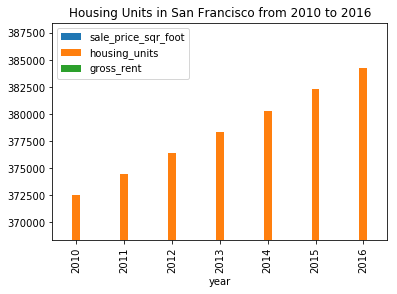

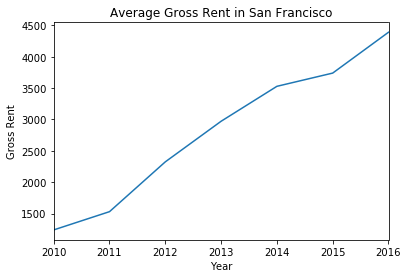

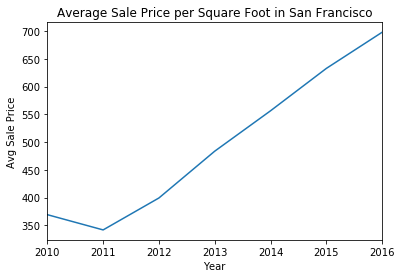

In [69]:
# YOUR CODE HERE!

title = '#Real Estate Analysis of San Francisco from 2010-2016'

welcome_tab = pn.Row(pn.Column(title), neighborhood_map())

market_analysis_row = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())





panel = pn.Tabs(("Welcome", welcome_tab), 
("Yearly Market Analysis", market_analysis_row))


## Serve the Panel Dashboard

Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'mapbox.center': {'lon': ...})
    [1] Row
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Str(None)
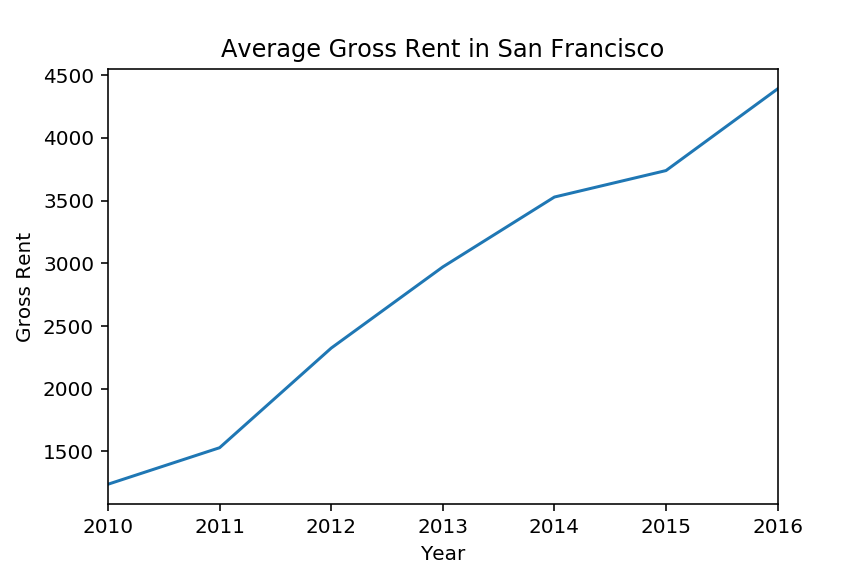
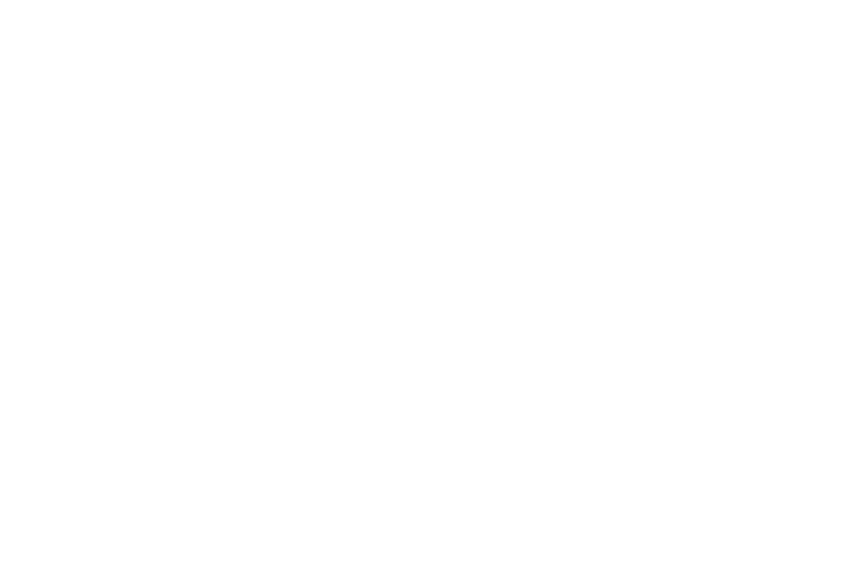

In [52]:
panel.servable()